# **Module 4: Programming Skills for Data Science**

# Lab Practice 4.1

**Topic:** Fraud Detection Analysis for a Financial Institution

**Problem Statement:** A financial institution needs to analyze transaction data for fraud detection. Use Python and R to manipulate and visualize this data, identifying any unusual patterns or outliers that may indicate fraudulent activity.


**Steps to be followed:**

1.	Create Sample Dataset:

          a. We create a sample dataset with 1000 transactions, including additional columns for merchant_id, merchant_category, and payment_method.

2.	Load Data into DataFrame:

          a. The sample data is converted into a DataFrame.

3.	Preprocess Data:

          a. Convert transaction_date to datetime format for proper date handling.

4.	Visualize Data:

          a. Distribution of Transaction Amounts: A histogram with a kernel density estimate (KDE) shows the distribution of transaction amounts.
          b. Transaction Amounts by Fraud Status: A boxplot compares transaction amounts for fraudulent and non-fraudulent transactions.
          c. Transaction Amounts Over Time by Fraud Status: A scatter plot shows transaction amounts over time, colored by fraud status.
          d. Identify Outliers: Z-scores are calculated to identify outliers in transaction amounts, which are highlighted in a scatter plot.


**Step 1: import libraries and Create Sample Dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(42)

# Create sample data
transaction_data = {
    'transaction_id': range(1, 1001),
    'customer_id': np.random.randint(1, 100, 1000),
    'transaction_date': pd.date_range(start='2023-01-01', periods=1000, freq='H'),
    'transaction_amount': np.random.uniform(10, 5000, 1000),
    'transaction_type': np.random.choice(['debit', 'credit'], 1000),
    'transaction_location': np.random.choice(['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix'], 1000),
    'merchant_id': np.random.randint(1, 50, 1000),
    'merchant_category': np.random.choice(['Electronics', 'Grocery', 'Clothing', 'Restaurant', 'Travel'], 1000),
    'payment_method': np.random.choice(['credit_card', 'debit_card', 'paypal', 'bank_transfer'], 1000),
    'fraud': np.random.choice([0, 1], 1000, p=[0.97, 0.03])
}

# Convert to DataFrame
df = pd.DataFrame(transaction_data)

/tmp/ipykernel_270741/418026495.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  'transaction_date': pd.date_range(start='2023-01-01', periods=1000, freq='H'),


**Step 2: Load Data into DataFrame**

In [3]:
print(df.head())


   transaction_id  customer_id    transaction_date  transaction_amount  \
0               1           52 2023-01-01 00:00:00         3041.700559   
1               2           93 2023-01-01 01:00:00         1229.322246   
2               3           15 2023-01-01 02:00:00         2496.256012   
3               4           72 2023-01-01 03:00:00         1658.438922   
4               5           61 2023-01-01 04:00:00         4669.122201   

  transaction_type transaction_location  merchant_id merchant_category  \
0           credit          Los Angeles           32           Grocery   
1            debit          Los Angeles           10            Travel   
2           credit              Chicago           22       Electronics   
3           credit             New York           17          Clothing   
4           credit             New York            4           Grocery   

  payment_method  fraud  
0  bank_transfer      0  
1    credit_card      0  
2  bank_transfer      0  
3     

**Step 3: Preprocess Data**

In [4]:
# Convert transaction_date to datetime
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

**Step 4: Visualize Data**

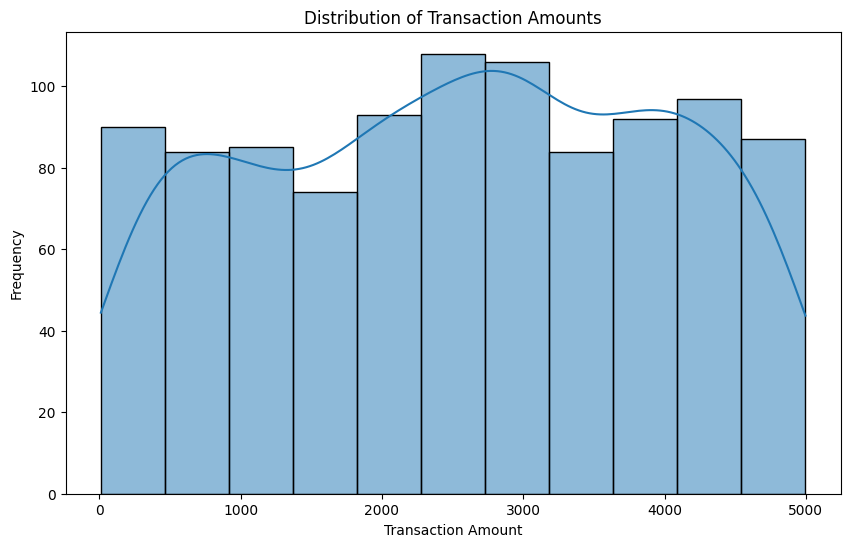

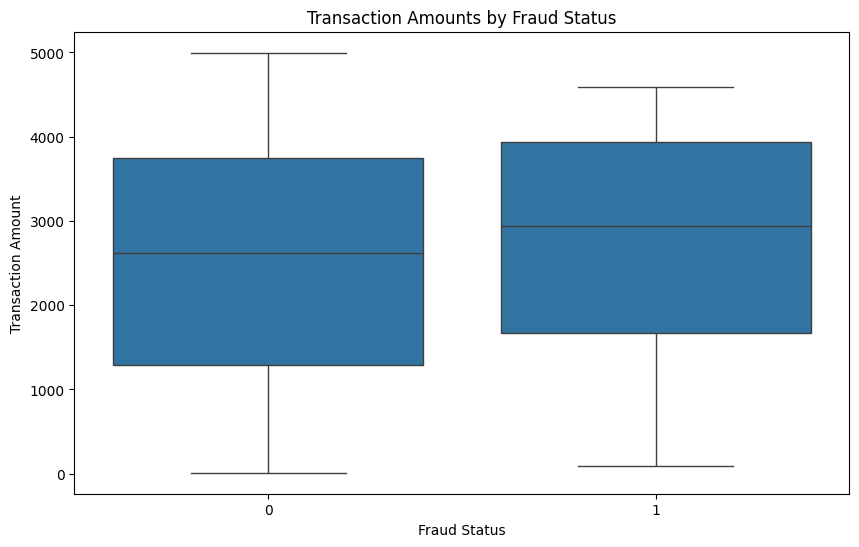

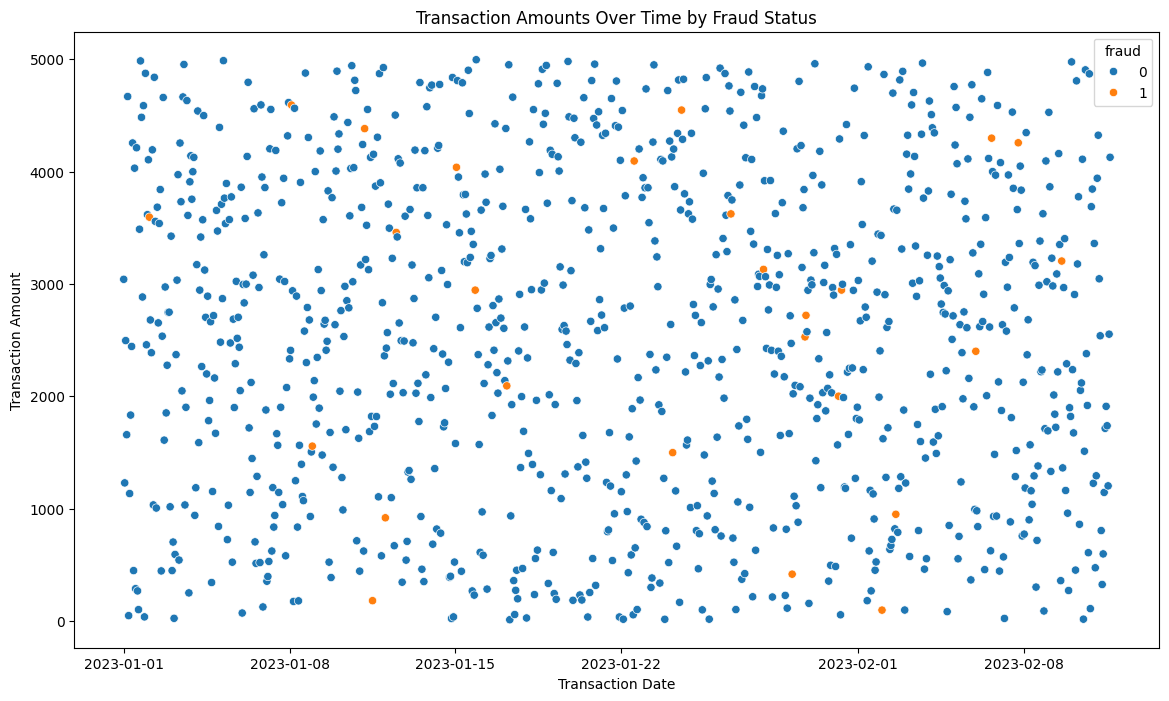

In [5]:
# Distribution of transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(df['transaction_amount'], kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

# Boxplot of transaction amounts by fraud status
plt.figure(figsize=(10, 6))
sns.boxplot(x='fraud', y='transaction_amount', data=df)
plt.title('Transaction Amounts by Fraud Status')
plt.xlabel('Fraud Status')
plt.ylabel('Transaction Amount')
plt.show()

# Scatter plot of transaction amounts over time, colored by fraud status
plt.figure(figsize=(14, 8))
sns.scatterplot(x='transaction_date', y='transaction_amount', hue='fraud', data=df)
plt.title('Transaction Amounts Over Time by Fraud Status')
plt.xlabel('Transaction Date')
plt.ylabel('Transaction Amount')
plt.show()

**Step 5: Identify Outliers using Z-Score**

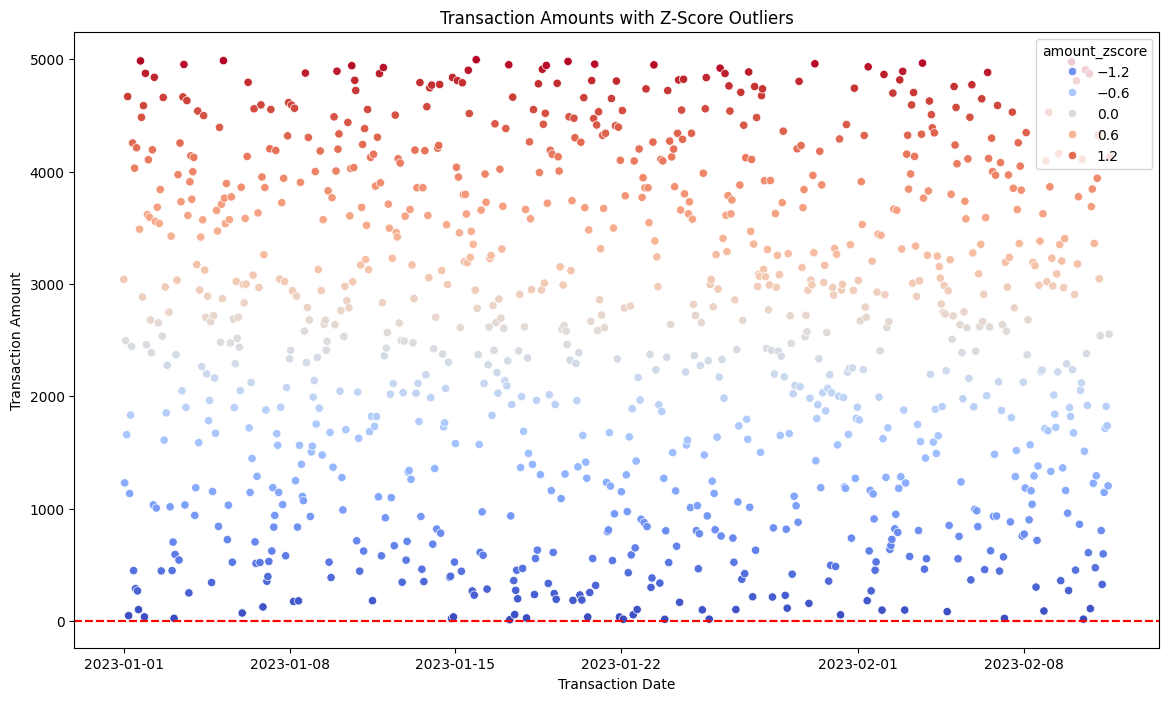

     transaction_id  transaction_amount  fraud  amount_zscore
0                 1         3041.700559      0       0.350836
1                 2         1229.322246      0      -0.927259
2                 3         2496.256012      0      -0.033813
3                 4         1658.438922      0      -0.624645
4                 5         4669.122201      0       1.498500
..              ...                 ...    ...            ...
995             996         1910.738532      0      -0.446722
996             997         1738.145625      0      -0.568435
997             998         1202.886108      0      -0.945902
998             999         2553.523991      0       0.006573
999            1000         4128.177680      0       1.117024

[1000 rows x 4 columns]


In [6]:
df['amount_zscore'] = (df['transaction_amount'] - df['transaction_amount'].mean()) / df['transaction_amount'].std()

# Scatter plot of transaction amounts with Z-score outliers highlighted
plt.figure(figsize=(14, 8))
sns.scatterplot(x='transaction_date', y='transaction_amount', hue='amount_zscore', palette='coolwarm', data=df)
plt.axhline(y=3, color='red', linestyle='--')
plt.axhline(y=-3, color='red', linestyle='--')
plt.title('Transaction Amounts with Z-Score Outliers')
plt.xlabel('Transaction Date')
plt.ylabel('Transaction Amount')
plt.show()

# Display DataFrame with Z-scores for further analysis
print(df[['transaction_id', 'transaction_amount', 'fraud', 'amount_zscore']])